## **El abandono de clientes en GTB; Empresa de Telecomunicaciones:**









En el competitivo mundo de las telecomunicaciones, el análisis de los abandonos de una compañía es una práctica esencial para su supervivencia y éxito. Desde el inicio de la industria, las empresas de telecomunicaciones han luchado por mantenerse al día con los rápidos avances tecnológicos y las cambiantes preferencias del consumidor.

La historia nos ha enseñado que las compañías que no analizan y abordan los abandonos de sus clientes, corren el riesgo de perder su base de clientes y, en última instancia, su posición en el mercado. Muchas compañías que alguna vez fueron líderes de la industria han desaparecido debido a su incapacidad para mantenerse al día con las demandas del mercado y la competencia.

El análisis de los abandonos de los clientes permite a las empresas de telecomunicaciones identificar las causas subyacentes de la pérdida de clientes y, por lo tanto, tomar medidas para retenerlos. Esto incluye la identificación de problemas en la calidad del servicio, la percepción de valor por parte del cliente, la satisfacción del cliente y la experiencia del usuario.

Además, el análisis de los abandonos puede ayudar a las empresas de telecomunicaciones a identificar oportunidades para mejorar sus productos y servicios, y desarrollar estrategias efectivas de retención de clientes. También puede ayudar a las empresas a identificar patrones en la migración de clientes hacia otros proveedores de servicios y tomar medidas proactivas para evitar futuras pérdidas de clientes.

En este análisis, buscaremos identificar las variables más relevantes que explican el abandono de la compañía de servicios de telecomunicaciones mediante el uso de un modelo de Random Forest. Para ello, realizaremos previamente un análisis exploratorio de las variables que determinarán el modelo predictivo.

Al identificar las variables que tienen una mayor influencia en la decisión de abandono, la compañía podrá generar estrategias efectivas para prevenir los abandonos potenciales y tomar medidas para retener a sus clientes. Por lo tanto, este análisis permitirá establecer medidas preventivas y mejorar la retención de clientes en el futuro.








## **Preguntas/ Hipótesis**
* ¿Cuál es el porcentaje de abandono durante el mes de agosto 2022?
*   ¿Existe relación entre la zona de un cliente y el abandono? H1: Existe relación entre la zona y el abandono
*   ¿Existe relación entre la antiguedad de un cliente y el abandono? H1:  Existe relación entre la antiguedad y el abandono
*¿Existe relación entre el servicio contratado y el abandono del cliente? H1: Existe relación entre el servicio contratado y el abandono
*¿Existe relación entre la cantidad de reclamos durante los últimos 3 meses y el abandono del cliente? H1: Existe relación entre los reclamos y el abandono
**¿Existe relación entre un upgrade de velocidad de internet y el abandono del cliente? H1: Existe relación entre un upgrade de velocidad de internet y el abandono



Archivo:https://docs.google.com/spreadsheets/d/1ZgtiJ9jQdRYDmQYsThErLEAMnshjUoJp/edit?usp=sharing&ouid=115129766546781084608&rtpof=true&sd=true

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Abandono_Clientes_Final.xlsx'

In [ ]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Carga Data Set**

In [ ]:
df = pd.read_excel(file_path)

**Exploración del Data Set**

In [ ]:
df.head(10)

,mes_alta,mes_baja,rangoaños,rangoreclamo,ABANDONO_FULL,CRUCE_ACTIVO,Codi_admzonal,Codi_localida,tiene_hispeed,Antg_meses_internet,...,ss_SVATI,ss_Inte,ss_SVA,ss_DATOS,ss_TVIGI,ss_Movi,ss_TV,ss_Tel,VELOCIDAD,VELOCIDAD_SUBIDA
0,2011-01-01,NaT,Mayor a 10 años,Sin Reclamo,0,VOZ+BA+TV,VLDV,VLDV,NO,124,...,0,1,0,0,0,0,1,1,4.0,0.5
1,2007-11-01,NaT,Mayor a 10 años,Sin Reclamo,0,VOZ+BA+TV,VLDV,VLDV,NO,96,...,0,1,0,0,0,0,1,1,8.0,8.0
2,1985-01-01,NaT,Mayor a 10 años,Sin Reclamo,0,VOZ+BA+TV,VLDV,VLDV,NO,97,...,0,1,0,0,0,0,1,1,4.0,0.5
3,1998-01-01,NaT,Mayor a 10 años,Sin Reclamo,0,VOZ+BA+TV,PMTT,PMTT,NO,109,...,0,1,0,0,0,0,1,1,4.0,0.5
4,1985-01-01,NaT,Mayor a 10 años,Sin Reclamo,0,VOZ+BA,VLDV,VLDV,NO,120,...,0,1,0,0,0,0,0,1,6.0,6.0
5,1985-01-01,NaT,Mayor a 10 años,Sin Reclamo,0,VOZ+BA,VLDV,VLDV,NO,105,...,0,1,0,0,0,0,0,1,2.0,0.5
6,1992-04-01,NaT,Mayor a 10 años,Sin Reclamo,0,VOZ+BA+TV,VLDV,VLDV,NO,217,...,0,1,0,0,0,0,1,1,15.0,5.0
7,1985-01-01,NaT,Mayor a 10 años,Sin Reclamo,0,VOZ+BA,VLDV,VLDV,NO,163,...,0,1,0,0,0,0,0,1,2.0,0.5
8,1985-01-01,NaT,Mayor a 10 años,Sin Reclamo,0,VOZ+BA,VLDV,PNGP,NO,151,...,0,1,0,0,0,0,0,1,4.0,0.5
9,2012-10-01,NaT,Mayor a 10 años,Sin Reclamo,0,VOZ+BA+TV,VLDV,VLDV,NO,177,...,0,1,0,0,0,0,1,1,4.0,0.5


In [ ]:
abandonoamean = df['ABANDONO_FULL'].mean()
print(abandonoamean)

0.04051448593042398


## **Porcentaje de Abandono por Zona.**

<ipython-input-9-4401d2a6b8d9>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1, rotation = 45, ha="right")


Text(0, 0.5, 'Tasa Abandono')

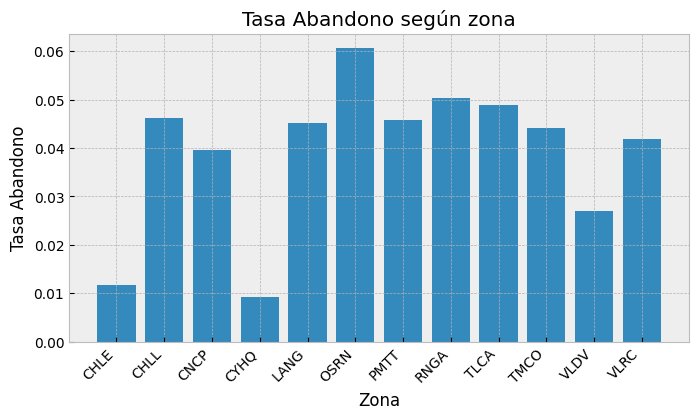

In [ ]:
indice = df.mes_baja
Abandonos_macrozona = pd.DataFrame(df, columns = ['ABANDONO_FULL','Codi_admzonal'])
Abandonos_macrozona.index = indice
Abandonos_macrozona.dropna(axis = 0, how = 'any',inplace = True)
macrozona = Abandonos_macrozona.groupby(by = 'Codi_admzonal')
macrozonamean = macrozona['ABANDONO_FULL'].mean()
x1 = list(macrozonamean.index)
y1 = macrozonamean.values
mpl.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x1,y1)
ax.set_title('Tasa Abandono según zona')
ax.set_xlabel('Zona')
ax.set_xticklabels(x1, rotation = 45, ha="right")
ax.set_ylabel('Tasa Abandono')

In [ ]:
# En este grafico podemos observar la tasa de abandono total por zona,
# podemos ver que respecto al total de abandonos, hay una por encima del resto que es la OSRN siendo de
# alrededor del 6% por sobre ese total, seguida por un grupo de al menos 7 zonas que le siguen de cerca y que
# poseen de igual forma una alta tasa de abandono siendo todos alrededor del 5% sobre el total:
# CHLL, LANG, PMTT, RNGA, TLCA, TMCO y VLRC. Esto nos marca que si bien es un dato de relevancia
# hay varias zonas que manejan tasas similares.

## **Abandono según servicio telefonía contratado.**

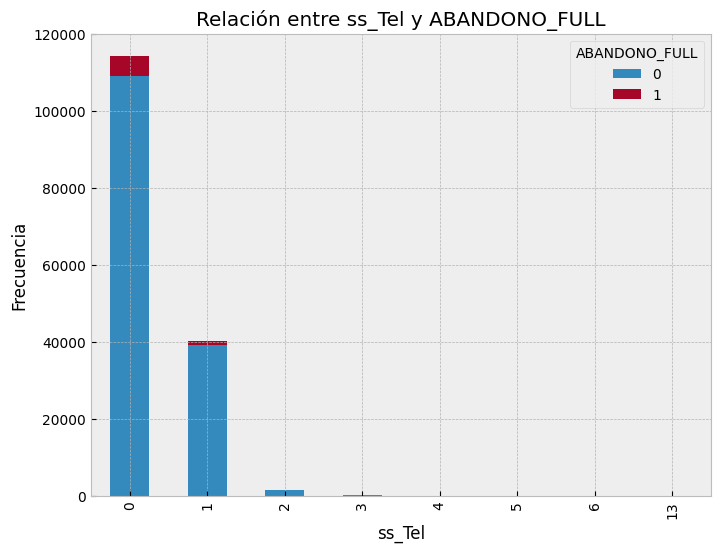

In [ ]:
import matplotlib.pyplot as plt

# Calcular la frecuencia de cada categoría de ss_Tel en función de ABANDONO_FULL
tabla_frecuencia = df.groupby(["ss_Tel", "ABANDONO_FULL"]).size().unstack()

# Crear un gráfico de barras
ax = tabla_frecuencia.plot(kind="bar", stacked=True, figsize=(8, 6))

# Etiquetas y título del gráfico
ax.set_xlabel("ss_Tel")
ax.set_ylabel("Frecuencia")
ax.set_title("Relación entre ss_Tel y ABANDONO_FULL")

# Mostrar el gráfico
plt.show()


In [ ]:
# Aquellos que contrataron el servicio "0" y "1" (que son la mayoria de los clientes) son los que mayores abandono
# tienen como es de esperarse debido al mayor caudal de clientes. Tambien podemos ver como en el servicio "0"
# tenemos una mayor frecuencia de abandono pero teniendo en cuenta que supera por gran diferencia al resto de los servicios
# no podemos decir a priori que este sea un factor diferencial de abandono.

<ipython-input-11-d820eefa31a1>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1, rotation = 45, ha="right")


Text(0, 0.5, 'Tasa Abandono')

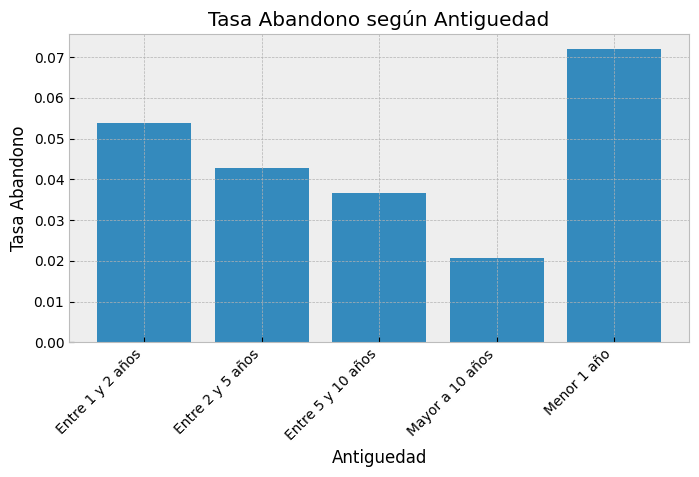

In [ ]:
indice = df.mes_baja
Abandonos_macrozona = pd.DataFrame(df, columns = ['ABANDONO_FULL','rangoaños'])
Abandonos_macrozona.index = indice
Abandonos_macrozona.dropna(axis = 0, how = 'any',inplace = True)
macrozona = Abandonos_macrozona.groupby(by = 'rangoaños')
macrozonamean = macrozona['ABANDONO_FULL'].mean()
x1 = list(macrozonamean.index)
y1 = macrozonamean.values
mpl.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x1,y1)
ax.set_title('Tasa Abandono según Antiguedad')
ax.set_xlabel('Antiguedad')
ax.set_xticklabels(x1, rotation = 45, ha="right")
ax.set_ylabel('Tasa Abandono')

In [ ]:
# Podemos observar en este grafico que la mayor tasa de abandonos se da durante el primer año de contrato
# lo que podria estar asociado a promociones o fallas en el servicio, etc.
# Tambien podemos ver que conforme el cliente pasa mas años en una compañia la tasa de abandono
# disminuye significativamente siendo la menor la de aquellos clientes con mas de 10 años de antiguedad.

In [ ]:
print(df.columns)


Index(['mes_alta', 'mes_baja', 'rangoaños', 'rangoreclamo', 'ABANDONO_FULL',
       'CRUCE_ACTIVO', 'Codi_admzonal', 'Codi_localida', 'tiene_hispeed',
       'Antg_meses_internet', 'Antg_meses_todo', 'vlor_neto_prom',
       'Ingreso_prom', 'rank_monto_MB', 'rank_bajada', 'tuvo_cambio_vel',
       'cambio_velo_cat', 'q_rec_TOT', 'q_rec_TOT_3meses', 'RENTA_PRESUNTA',
       'ss_SVATI', 'ss_Inte', 'ss_SVA', 'ss_DATOS', 'ss_TVIGI', 'ss_Movi',
       'ss_TV', 'ss_Tel', 'VELOCIDAD', 'VELOCIDAD_SUBIDA'],
      dtype='object')


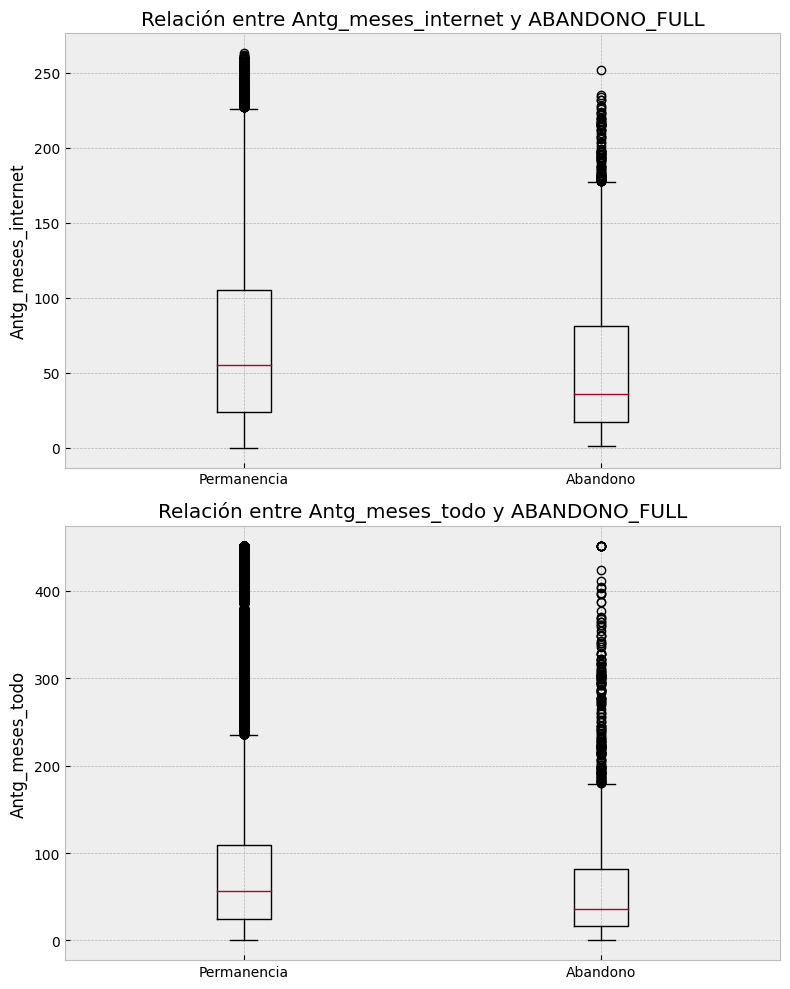

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Gráfico de caja para Antg_meses_internet y ABANDONO_FULL
axs[0].boxplot([df.loc[df["ABANDONO_FULL"] == 0, "Antg_meses_internet"],
               df.loc[df["ABANDONO_FULL"] == 1, "Antg_meses_internet"]],
              labels=["Permanencia", "Abandono"])
axs[0].set_ylabel("Antg_meses_internet")
axs[0].set_title("Relación entre Antg_meses_internet y ABANDONO_FULL")

# Gráfico de caja para Antg_meses_todo y ABANDONO_FULL
axs[1].boxplot([df.loc[df["ABANDONO_FULL"] == 0, "Antg_meses_todo"],
               df.loc[df["ABANDONO_FULL"] == 1, "Antg_meses_todo"]],
              labels=["Permanencia", "Abandono"])
axs[1].set_ylabel("Antg_meses_todo")
axs[1].set_title("Relación entre Antg_meses_todo y ABANDONO_FULL")

# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()





## **Porcentaje de Abandono según servicios contratados.**

<ipython-input-14-1e91db2b536b>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1, rotation = 45, ha="right")


Text(0, 0.5, 'Tasa Abandono')

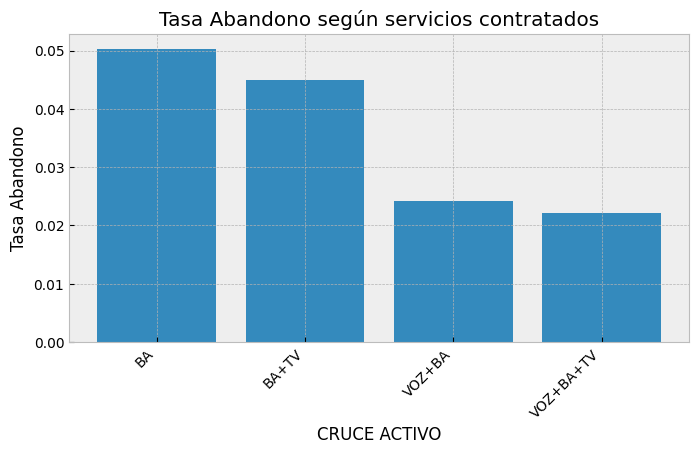

In [ ]:
indice = df.mes_baja
Abandonos_macrozona = pd.DataFrame(df, columns = ['ABANDONO_FULL','CRUCE_ACTIVO'])
Abandonos_macrozona.index = indice
Abandonos_macrozona.dropna(axis = 0, how = 'any',inplace = True)
macrozona = Abandonos_macrozona.groupby(by = 'CRUCE_ACTIVO')
macrozonamean = macrozona['ABANDONO_FULL'].mean()
x1 = list(macrozonamean.index)

y1 = macrozonamean.values

mpl.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x1,y1)
ax.set_title('Tasa Abandono según servicios contratados')
ax.set_xlabel('CRUCE ACTIVO')
ax.set_xticklabels(x1, rotation = 45, ha="right")
ax.set_ylabel('Tasa Abandono')

In [ ]:
# Podemos observar que la mayor tasa de abandono de la compañia se da en clientes que consumen el servicio de banda ancha BA,
# muy similarmente por los que consumen banda ancha + TV, siendo estos el doble o mas de las otras opciones.

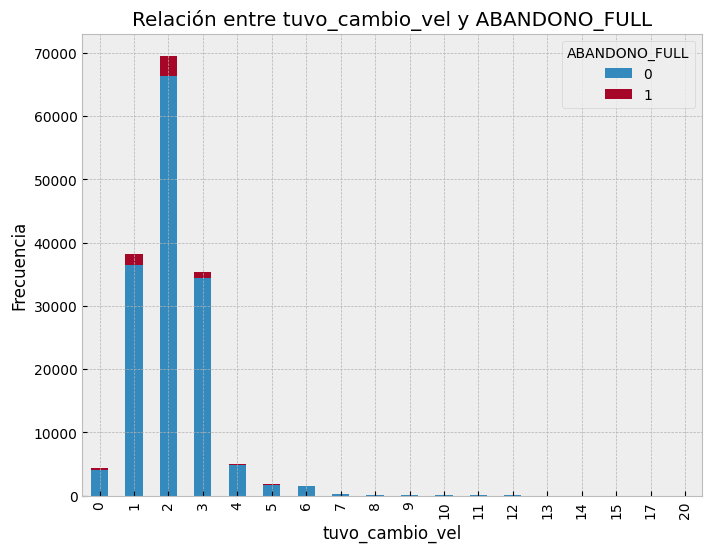

In [ ]:
import matplotlib.pyplot as plt

# Calcular la frecuencia de cada categoría de tuvo_cambio_vel en función de ABANDONO_FULL
tabla_frecuencia = df.groupby(["tuvo_cambio_vel", "ABANDONO_FULL"]).size().unstack()

# Crear un gráfico de barras
ax = tabla_frecuencia.plot(kind="bar", stacked=True, figsize=(8, 6))

# Etiquetas y título del gráfico
ax.set_xlabel("tuvo_cambio_vel")
ax.set_ylabel("Frecuencia")
ax.set_title("Relación entre tuvo_cambio_vel y ABANDONO_FULL")

# Mostrar el gráfico
plt.show()


In [ ]:
# Aca podemos ver que la frecuencia de abandono es mayor para clientes que cambiaron su velocidad entre 1 y 3 veces,
# siendo estos significativamente mayor al resto de los cambios e incluso de los casos sin cambios.
# El caso de mayor frecuencia de abandono es para clientes con dos cambios de velocidad.
# En todo este analisis se tiene en cuenta que en los casos donde se ve el mayor abandono tambien son los casos de
# mayor frecuencia general, lo que esto implica es que la mayoria de los clientes en general hizo entre 1 y 3 cambios en la
#velocidad del servicio

## **Porcentaje de Abandono según cantidad de reclamos durante los últimos 3 meses.**

<ipython-input-16-b709bcfd7973>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1, rotation = 45, ha="right")


Text(0, 0.5, 'Tasa Abandono')

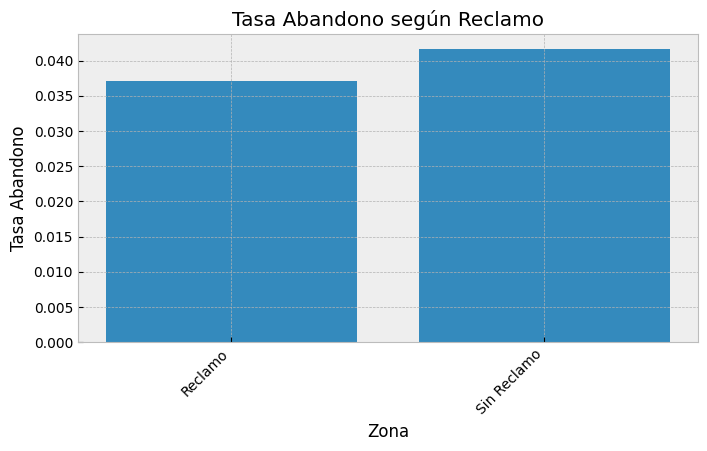

In [ ]:

indice = df.mes_baja
Abandonos_macrozona = pd.DataFrame(df, columns = ['ABANDONO_FULL','rangoreclamo'])
Abandonos_macrozona.index = indice
Abandonos_macrozona.dropna(axis = 0, how = 'any',inplace = True)
macrozona = Abandonos_macrozona.groupby(by = 'rangoreclamo')
macrozonamean = macrozona['ABANDONO_FULL'].mean()
x1 = list(macrozonamean.index)

y1 = macrozonamean.values

mpl.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x1,y1)
ax.set_title('Tasa Abandono según Reclamo')
ax.set_xlabel('Zona')
ax.set_xticklabels(x1, rotation = 45, ha="right")
ax.set_ylabel('Tasa Abandono')

In [ ]:
# Este grafico nos amrca que si bien el abandono de la compañia es mayor en los casos donde se hicieron reclamos,
# la diferencia no es altamente significativa respecto a los que no los hicieron.

## **Porcentaje de Abandono según cambio de velocidad del servicio.**

<ipython-input-17-f4f179de365a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x1, rotation = 45, ha="right")


Text(0, 0.5, 'Tasa Abandono')

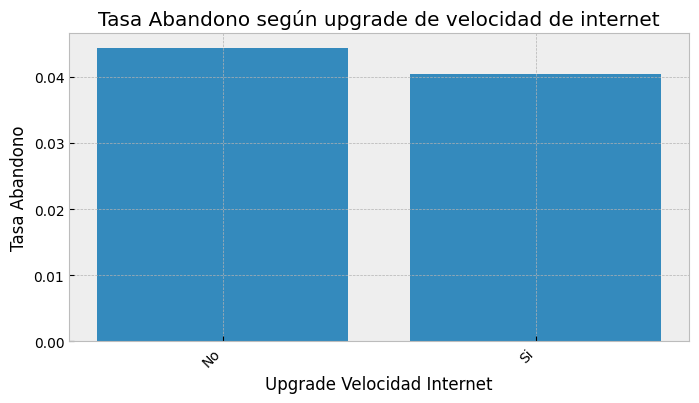

In [ ]:
indice = df.mes_baja
Abandonos_macrozona = pd.DataFrame(df, columns = ['ABANDONO_FULL','cambio_velo_cat'])
Abandonos_macrozona.index = indice
Abandonos_macrozona.dropna(axis = 0, how = 'any',inplace = True)
macrozona = Abandonos_macrozona.groupby(by = 'cambio_velo_cat')
macrozonamean = macrozona['ABANDONO_FULL'].mean()
x1 = list(macrozonamean.index)

y1 = macrozonamean.values

mpl.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x1,y1)
ax.set_title('Tasa Abandono según upgrade de velocidad de internet')
ax.set_xlabel('Upgrade Velocidad Internet')
ax.set_xticklabels(x1, rotation = 45, ha="right")
ax.set_ylabel('Tasa Abandono')

In [ ]:
# Como en el caso anterior podemos observar que no hay una diferencia significativa respecto a la tasa de
# abandonos entre los que hicieron un upgrade en la velocidad y los que no.

## **Respuestas Parciales a las preguntas.**


Según los resultados podemos mencionar lo siguiente a cada una de las preguntas:

* ¿Cuál es el porcentaje de abandono durante el mes de agosto 2022? Durante el mes de agosto de 2022 un 4% de los clientes de la cartera abandonaron totalmente los servicios contratados en la compañia de telecomunicaciones

*   ¿Existe relación entre la zona de un cliente y el abandono?
Segun el grafico de barras hay una relación entre las zonas, por ejemplo osorno y rancagua presentan tasas de abandono mas altas, mientras que chileo una de las mas bajas.
*   ¿Existe relación entre la antiguedad de un cliente y el abandono?
Segpun el análisis descriptivo, la antiguedad es un factor, a menor antiguedad mayor tasa de abandono.
*¿Existe relación entre el servicio contratado y el abandono del cliente?
A mayor cantidad de servicios contratado menor es la tasa de abandono.
*¿Existe relación entre la cantidad de reclamos durante los últimos 3 meses y el abandono del cliente?
Los clientes con menos reclamos son los que mas abandonan, aparentemente el problema del abandono podría ser un factor no necesariamente técnico. También se podría mencionar que probablemente los clientes que reclaman quieren una solución y dan chance para mantener sus servicios a diferencia de los que no generan ningún reclamo aún teniendo fallas.
*¿Existe relación entre un upgrade de velocidad y el abandono del cliente?
Los clientes con upgrade abandonan menos que los que no los han tenido, hay que revisar si son diferencias estadisticamente significativas, dado que el porcentaje es bajo y habría que verificarlo a través de alguna prueba estadistica.

 **A continuación se realizará un modelo predictivo que permita distinguir si las variables exploradas anteriormente tienen relación con el abandono, y también se indagará si existen otras variables que estén influyendo en el abandono a través de la aplicación de un featuring selection. Previo a esto, hay que modicar algunos campos del data set.**

# **Procesamiento de datos**

Primero, eliminaremos los campos que no nos serviran como variables predictoras

In [ ]:
df2=df

In [ ]:
#básicamente eliminamos variables que o no nos sirven (fechas) o ya estan contenidas en variables continuas (antiguedad, reclamos, cambio velocidad)
df2=df2.drop(['mes_alta','mes_baja','rangoaños','rangoreclamo','cambio_velo_cat'],axis=1)

In [ ]:
df2.head(3)

,ABANDONO_FULL,CRUCE_ACTIVO,Codi_admzonal,Codi_localida,tiene_hispeed,Antg_meses_internet,Antg_meses_todo,vlor_neto_prom,Ingreso_prom,rank_monto_MB,...,ss_SVATI,ss_Inte,ss_SVA,ss_DATOS,ss_TVIGI,ss_Movi,ss_TV,ss_Tel,VELOCIDAD,VELOCIDAD_SUBIDA
0,0,VOZ+BA+TV,VLDV,VLDV,NO,124,452,76075.333333,76076,99,...,0,1,0,0,0,0,1,1,4.0,0.5
1,0,VOZ+BA+TV,VLDV,VLDV,NO,96,452,57793.750000,57794,99,...,0,1,0,0,0,0,1,1,8.0,8.0
2,0,VOZ+BA+TV,VLDV,VLDV,NO,97,452,40100.500000,40101,99,...,0,1,0,0,0,0,1,1,4.0,0.5


Transformación de variables nominales a numéricas para poder incluirlas en el modelo predictivo y también eliminamos los campos que contienen NA

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df2['CRUCE_ACTIVO'])

# printing label
label

array([3, 3, 3, ..., 0, 3, 1])

In [ ]:

df2.drop("CRUCE_ACTIVO", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
df2["CRUCE_ACTIVO"] = label

# printing Dataframe
df2.head(2)


,ABANDONO_FULL,Codi_admzonal,Codi_localida,tiene_hispeed,Antg_meses_internet,Antg_meses_todo,vlor_neto_prom,Ingreso_prom,rank_monto_MB,rank_bajada,...,ss_Inte,ss_SVA,ss_DATOS,ss_TVIGI,ss_Movi,ss_TV,ss_Tel,VELOCIDAD,VELOCIDAD_SUBIDA,CRUCE_ACTIVO
0,0,VLDV,VLDV,NO,124,452,76075.333333,76076,99,99,...,1,0,0,0,0,1,1,4.0,0.5,3
1,0,VLDV,VLDV,NO,96,452,57793.750000,57794,99,99,...,1,0,0,0,0,1,1,8.0,8.0,3


In [ ]:
df2.CRUCE_ACTIVO.dtypes

dtype('int64')

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df2['Codi_admzonal'])
# removing the column 'Purchased' from df
# as it is of no use now.
df2.drop("Codi_admzonal", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
df2["Codi_admzonal"] = label

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df2['tiene_hispeed'])
# removing the column 'Purchased' from df
# as it is of no use now.
df2.drop("tiene_hispeed", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
df2["tiene_hispeed"] = label

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df2['Codi_localida'])
# removing the column 'Purchased' from df
# as it is of no use now.
df2.drop("Codi_localida", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
df2["Codi_localida"] = label

In [ ]:
df2.dtypes

ABANDONO_FULL            int64
Antg_meses_internet      int64
Antg_meses_todo          int64
vlor_neto_prom         float64
Ingreso_prom             int64
rank_monto_MB            int64
rank_bajada              int64
tuvo_cambio_vel          int64
q_rec_TOT                int64
q_rec_TOT_3meses         int64
RENTA_PRESUNTA         float64
ss_SVATI                 int64
ss_Inte                  int64
ss_SVA                   int64
ss_DATOS                 int64
ss_TVIGI                 int64
ss_Movi                  int64
ss_TV                    int64
ss_Tel                   int64
VELOCIDAD              float64
VELOCIDAD_SUBIDA       float64
CRUCE_ACTIVO             int64
Codi_admzonal            int64
tiene_hispeed            int64
Codi_localida            int64
dtype: object

In [ ]:
df2 = df2.astype({"VELOCIDAD":'int', "VELOCIDAD_SUBIDA":'int', "vlor_neto_prom":'int'})

In [ ]:
df2.isna().sum()

ABANDONO_FULL              0
Antg_meses_internet        0
Antg_meses_todo            0
vlor_neto_prom             0
Ingreso_prom               0
rank_monto_MB              0
rank_bajada                0
tuvo_cambio_vel            0
q_rec_TOT                  0
q_rec_TOT_3meses           0
RENTA_PRESUNTA         79512
ss_SVATI                   0
ss_Inte                    0
ss_SVA                     0
ss_DATOS                   0
ss_TVIGI                   0
ss_Movi                    0
ss_TV                      0
ss_Tel                     0
VELOCIDAD                  0
VELOCIDAD_SUBIDA           0
CRUCE_ACTIVO               0
Codi_admzonal              0
tiene_hispeed              0
Codi_localida              0
dtype: int64

In [ ]:
df2.drop("RENTA_PRESUNTA", axis=1, inplace=True)

In [ ]:
df2.dtypes

ABANDONO_FULL          int64
Antg_meses_internet    int64
Antg_meses_todo        int64
vlor_neto_prom         int64
Ingreso_prom           int64
rank_monto_MB          int64
rank_bajada            int64
tuvo_cambio_vel        int64
q_rec_TOT              int64
q_rec_TOT_3meses       int64
ss_SVATI               int64
ss_Inte                int64
ss_SVA                 int64
ss_DATOS               int64
ss_TVIGI               int64
ss_Movi                int64
ss_TV                  int64
ss_Tel                 int64
VELOCIDAD              int64
VELOCIDAD_SUBIDA       int64
CRUCE_ACTIVO           int64
Codi_admzonal          int64
tiene_hispeed          int64
Codi_localida          int64
dtype: object

# **Identificación y tratamiento de outliers**

In [ ]:
df2.shape

(156117, 24)

In [ ]:
dfboxplot1=df2.iloc[:, 1:12]

In [ ]:
dfboxplot2=df2.iloc[:, 13:24]

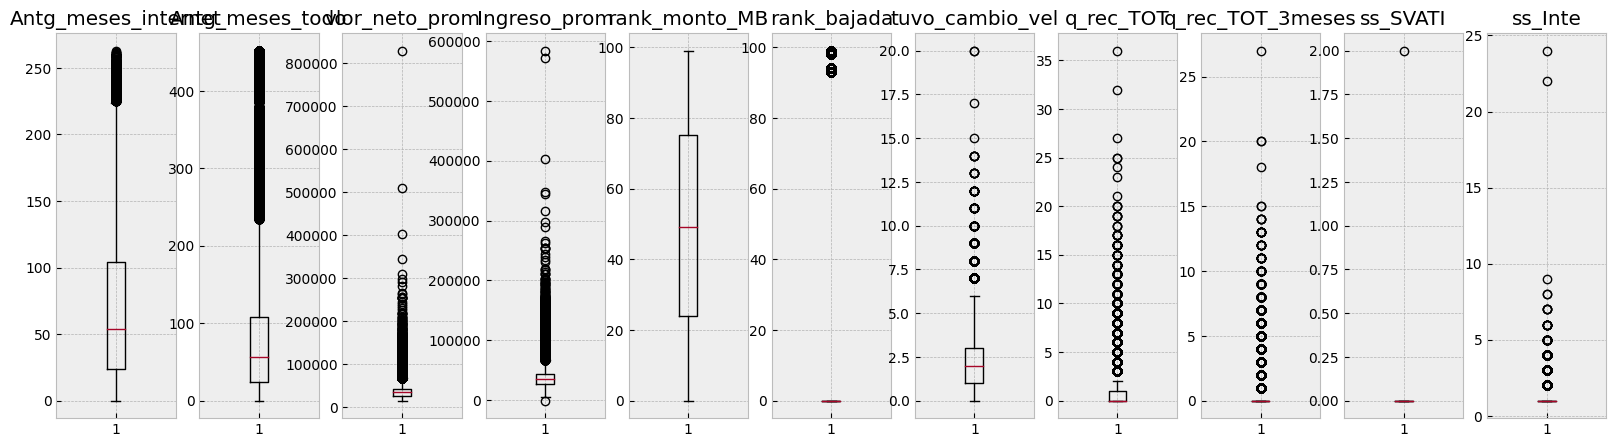

In [ ]:
# Crea la figura y los subplots
fig, axs = plt.subplots(ncols=len(dfboxplot1.columns), figsize=(20, 5))

# Genera el boxplot para cada variable
for i, col in enumerate(dfboxplot1.columns):
    axs[i].boxplot(dfboxplot1[col])
    axs[i].set_title(col)

# Muestra la figura
plt.show()


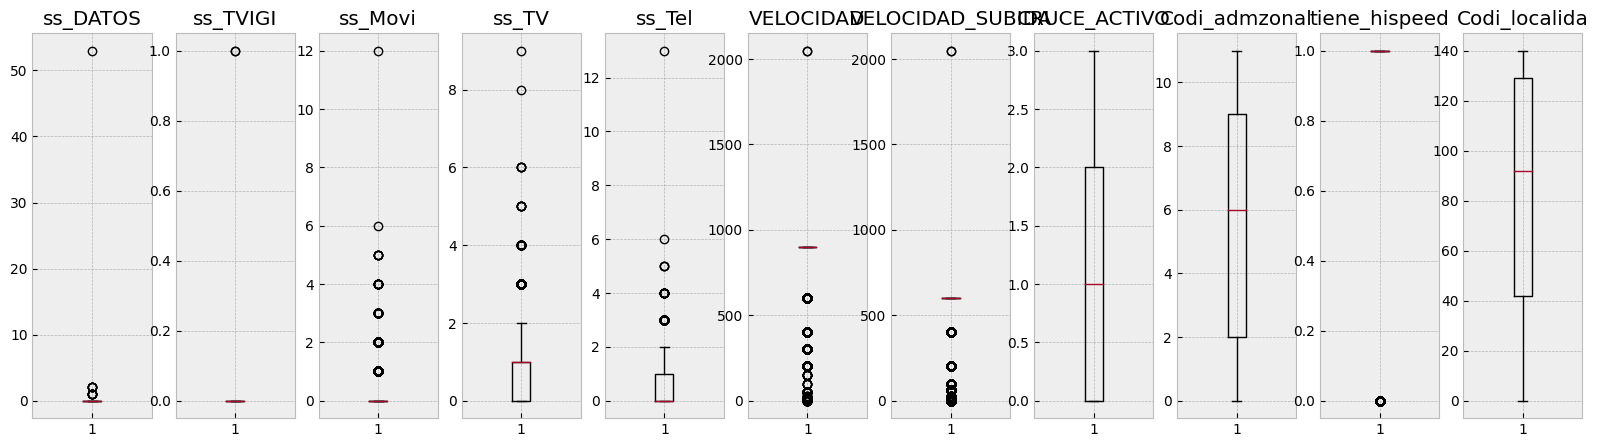

In [ ]:
# Crea la figura y los subplots
fig, axs = plt.subplots(ncols=len(dfboxplot2.columns), figsize=(20, 5))

# Genera el boxplot para cada variable
for i, col in enumerate(dfboxplot2.columns):
    axs[i].boxplot(dfboxplot2[col])
    axs[i].set_title(col)

# Muestra la figura
plt.show()

In [ ]:






# Selecciona todas las columnas excepto la variable dependiente
columns_to_include = [col for col in df2.columns if col != 'ABANDONO_FULL']

# Calcula la media y la desviación estándar de cada columna seleccionada
mean = df2[columns_to_include].mean()
std = df2[columns_to_include].std()

# Define el umbral para identificar outliers
threshold = 3

# Crea un filtro booleano para cada fila que indica si es un outlier o no
outlier_filter = ((df2[columns_to_include] - mean).abs() > threshold * std).any(axis=1)

# Elimina las filas que contienen outliers
data_without_outliers = df2[~outlier_filter]

# Convertir todas las columnas a int
data_without_outliers[columns_to_include] = data_without_outliers[columns_to_include].astype(int)

# Combina los datos filtrados con la variable dependiente original
df3 = pd.concat([df2['ABANDONO_FULL'], data_without_outliers[columns_to_include].astype(int)], axis=1)


<ipython-input-37-12931c3f4b42>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outliers[columns_to_include] = data_without_outliers[columns_to_include].astype(int)


In [ ]:
df3=df3.dropna()

In [ ]:
df3.dtypes

ABANDONO_FULL            int64
Antg_meses_internet    float64
Antg_meses_todo        float64
vlor_neto_prom         float64
Ingreso_prom           float64
rank_monto_MB          float64
rank_bajada            float64
tuvo_cambio_vel        float64
q_rec_TOT              float64
q_rec_TOT_3meses       float64
ss_SVATI               float64
ss_Inte                float64
ss_SVA                 float64
ss_DATOS               float64
ss_TVIGI               float64
ss_Movi                float64
ss_TV                  float64
ss_Tel                 float64
VELOCIDAD              float64
VELOCIDAD_SUBIDA       float64
CRUCE_ACTIVO           float64
Codi_admzonal          float64
tiene_hispeed          float64
Codi_localida          float64
dtype: object

In [ ]:
df3 = df3.astype(int)

In [ ]:
dfboxplot1=df3.iloc[:, 2:12]

In [ ]:
dfboxplot2=df3.iloc[:, 13:24]

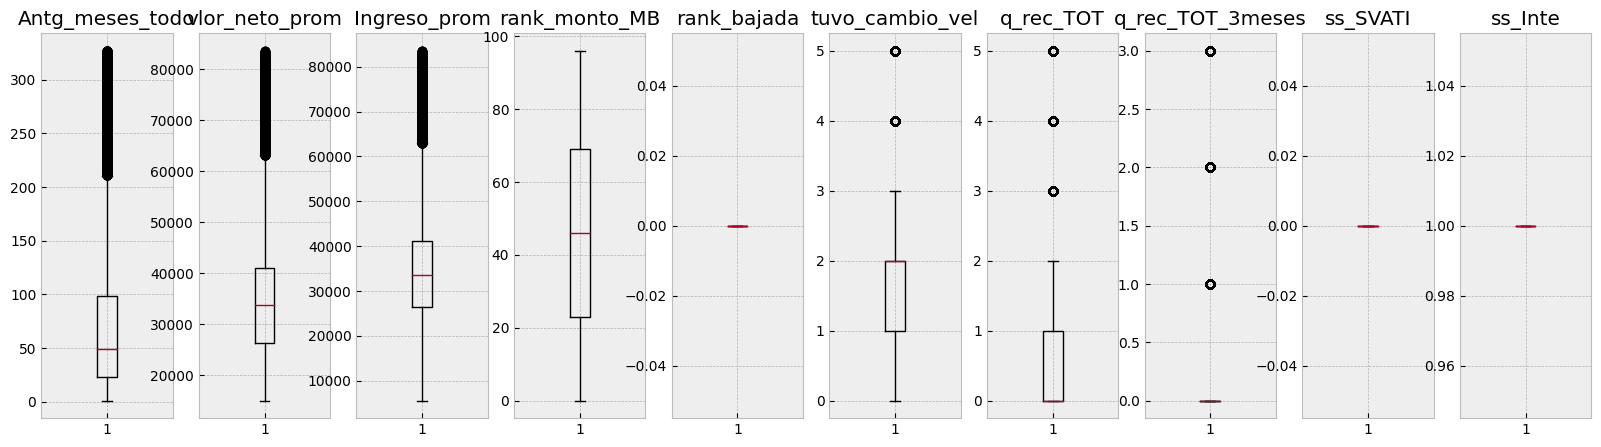

In [ ]:
# Crea la figura y los subplots
fig, axs = plt.subplots(ncols=len(dfboxplot1.columns), figsize=(20, 5))

# Genera el boxplot para cada variable
for i, col in enumerate(dfboxplot1.columns):
    axs[i].boxplot(dfboxplot1[col])
    axs[i].set_title(col)

# Muestra la figura
plt.show()

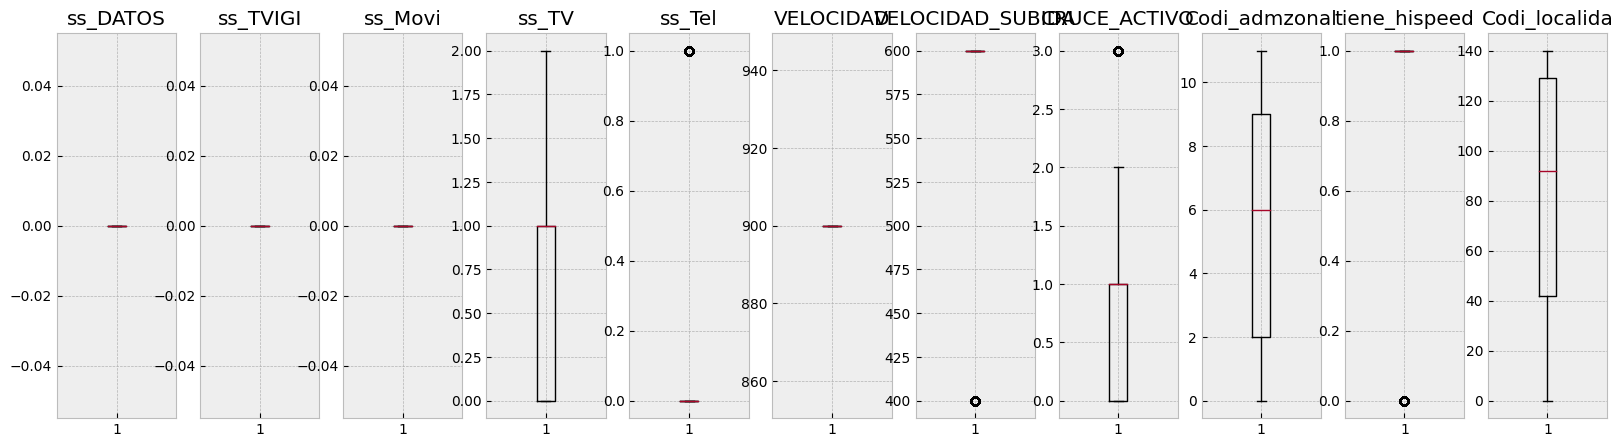

In [ ]:
# Crea la figura y los subplots
fig, axs = plt.subplots(ncols=len(dfboxplot2.columns), figsize=(20, 5))

# Genera el boxplot para cada variable
for i, col in enumerate(dfboxplot2.columns):
    axs[i].boxplot(dfboxplot2[col])
    axs[i].set_title(col)

# Muestra la figura
plt.show()

Con el tratamiento de outlier el boxplot de las variables del data set mejora sustancialmente en terminos de datos anomalos.

In [ ]:
!pip install imbalanced-learn #instalación paquete de balanceo#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from imblearn.over_sampling import RandomOverSampler

# Dividir características (X) y variable objetivo (y)
X = df3.drop("ABANDONO_FULL", axis=1)
y = df3["ABANDONO_FULL"]

# Aplicar oversampling
oversampler = RandomOverSampler()
X_balanced, y_balanced = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

# **Featuring Selection**
**Luego del procesamiento de los datos, aplicamos el Featuring Selection para quedarnos con los campos más releventes para el modelo que busca predecir el abandono de los clientes**

In [ ]:

from sklearn.model_selection import train_test_split



# Dividir en variables independientes (X) y variables dependientes (y)
X = df_balanced.drop("ABANDONO_FULL", axis=1) # asumiendo que "target" es la variable dependiente
y = df_balanced["ABANDONO_FULL"]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression()

In [ ]:
# Selección de características
selector = RFE(model, n_features_to_select=7, step=1)
selector.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE(estimator=LogisticRegression(), n_features_to_select=7)

In [ ]:
# Obtener las características seleccionadas
selected_features = X.columns[selector.support_]

# Imprimir las características seleccionadas
print(selected_features)



Index(['Antg_meses_internet', 'Antg_meses_todo', 'rank_monto_MB', 'VELOCIDAD',
       'VELOCIDAD_SUBIDA', 'CRUCE_ACTIVO', 'Codi_admzonal'],
      dtype='object')


In [ ]:
df4=df_balanced[['ABANDONO_FULL', 'Antg_meses_internet','Antg_meses_todo', 'rank_monto_MB','tuvo_cambio_vel','ss_Tel','CRUCE_ACTIVO','Codi_admzonal']]

In [ ]:
df4.head(100)

,ABANDONO_FULL,Antg_meses_internet,Antg_meses_todo,rank_monto_MB,tuvo_cambio_vel,ss_Tel,CRUCE_ACTIVO,Codi_admzonal
0,0,9,217,57,0,1,3,2
1,0,214,214,90,0,0,1,9
2,0,137,137,94,0,1,3,2
3,0,134,134,65,0,0,0,6
4,0,89,89,94,0,1,3,9
...,...,...,...,...,...,...,...,...
95,0,11,11,65,0,0,0,11
96,0,11,11,40,0,0,0,2
97,0,11,11,76,0,0,0,11
98,0,11,11,35,0,0,0,5


Verificamos nuevamente datos anomalos con el subset de datos con las variables a trabajar con el modelo predictivo.


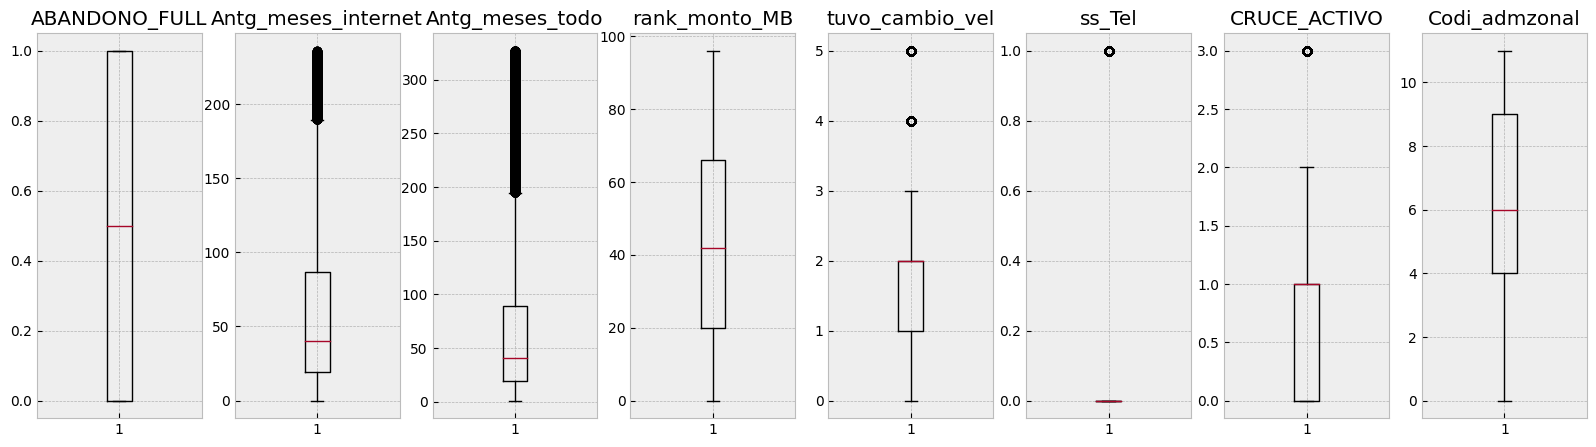

In [ ]:
# Crea la figura y los subplots
fig, axs = plt.subplots(ncols=len(df4.columns), figsize=(20, 5))

# Genera el boxplot para cada variable
for i, col in enumerate(df4.columns):
    axs[i].boxplot(df4[col])
    axs[i].set_title(col)

# Muestra la figura
plt.show()

**Luego del tratamiento de los datos y la selección de variables a través del featuring selection aplicaremos un modelo clasificador Random Forest**
La elección de este modelo ya que la variable que queremos precir es el abandono, el cual consta de dos clases; Abandona(positivo=1) o no Abandona(Negativo=0)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# **Machine Learning: Random Forest**
**Posterior a la selección de variable, corremos el modelo random forest para predecir los abandonos**

In [ ]:
# definimos matriz de diseño X y vector respuesta y
X = df4.drop("ABANDONO_FULL", 1)
y = df4['ABANDONO_FULL']
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_test)

<ipython-input-56-d78392d4fddb>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df4.drop("ABANDONO_FULL", 1)


In [ ]:


# Obtener las probabilidades de clase positiva (abandono) con X_test
proba_abandono = modelo.predict_proba(X_test)[:, 1]

# Imprimir las probabilidades de abandono junto con las variables dependientes
for i, proba in enumerate(proba_abandono):
    print("Probabilidad de abandono:", proba)
    print("Variables dependientes:")
    print(X_test.iloc[i])  # Imprimir las variables correspondientes a la predicción
    print("-" * 50)

Se han truncado las últimas 5000 líneas del flujo de salida.
tuvo_cambio_vel         2
ss_Tel                  0
CRUCE_ACTIVO            0
Codi_admzonal          11
Name: 219197, dtype: int64
--------------------------------------------------
Probabilidad de abandono: 1.0
Variables dependientes:
Antg_meses_internet    165
Antg_meses_todo        165
rank_monto_MB           69
tuvo_cambio_vel          3
ss_Tel                   1
CRUCE_ACTIVO             3
Codi_admzonal           10
Name: 149998, dtype: int64
--------------------------------------------------
Probabilidad de abandono: 0.02
Variables dependientes:
Antg_meses_internet    126
Antg_meses_todo        126
rank_monto_MB           20
tuvo_cambio_vel          2
ss_Tel                   0
CRUCE_ACTIVO             1
Codi_admzonal            5
Name: 41697, dtype: int64
--------------------------------------------------
Probabilidad de abandono: 0.35
Variables dependientes:
Antg_meses_internet    27
Antg_meses_todo        27
rank_mon

In [ ]:
# Obtenemos la importancia de las variables
importancia_vars = pd.DataFrame({'Variable': X.columns, 'Importancia': modelo.feature_importances_})
importancia_vars = importancia_vars.sort_values('Importancia', ascending=False)

# Imprimimos la importancia de las variables
print(importancia_vars)

              Variable  Importancia
2        rank_monto_MB     0.426803
1      Antg_meses_todo     0.195552
0  Antg_meses_internet     0.192481
6        Codi_admzonal     0.121188
3      tuvo_cambio_vel     0.035825
5         CRUCE_ACTIVO     0.019421
4               ss_Tel     0.008731


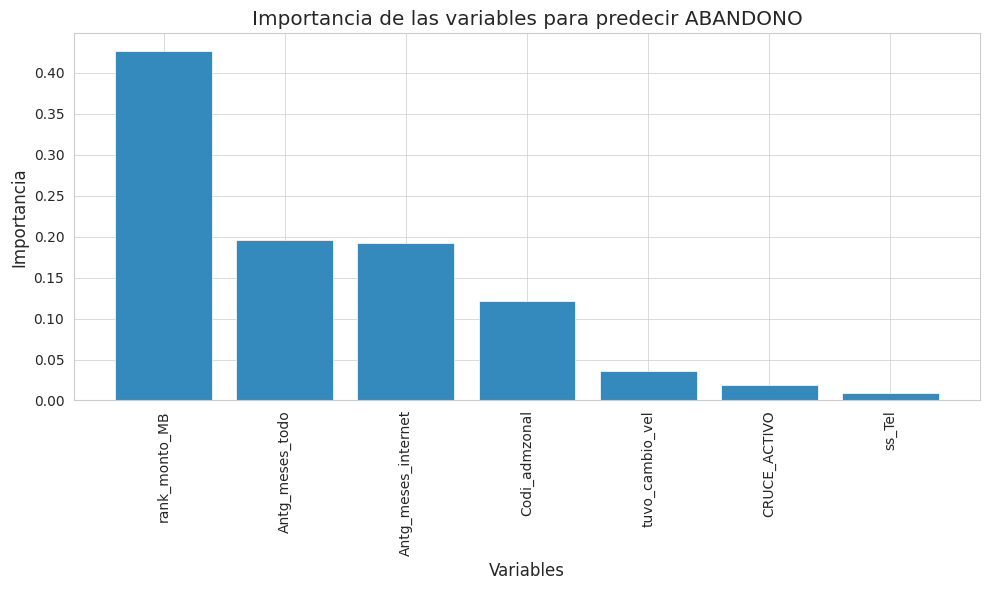

In [ ]:
import matplotlib.pyplot as plt

# Graficar las variables importantes en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(importancia_vars['Variable'], importancia_vars['Importancia'])
plt.xticks(rotation='vertical')
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables para predecir ABANDONO')
plt.tight_layout()
plt.show()


In [ ]:
# Vemos en el grafico que la variable de mayor importancia es el rank_monto_MB siendo tambien el doble o incluso mas que
# el resto de las variables. Le sigue la antiguedad en meses tanto de los que tienen todos los servicios contratados como
# de los que tienen solo el servicio de internet, y por ultimo teniendo alguna significancia esta el codigo de la zona
# a la que pertenece el cliente y el cambio de velocidad.

Para entender de mejor manera como estas variables afectan al abandono, daremos la descripción de las variables con mayor relevancia en el abandono:



*  **rank_monto_MB:** :Se refiere al ranking del monto pagado por MB de bajada en comparación con el resto de los clientes. Este ranking se encuentra en una escala del 1 al 100, donde el valor 1 significa que ningún otro cliente paga menos por MB de bajada que él. Por otro lado, el valor 100 indica que el 100% del resto de la cartera de clientes paga menos por MB de bajada en comparación con él.

*   **Antg_meses_todo:** Cantidad de meses de antiguedad del cliente, incuye todos los servicios contratados

*   **Antg_meses_internet:** Cantidad de meses de antiguedad del cliente, incuye sólo el servicio de internet.

*   **Codi_admzonal:** Codigo de la zona en la que el cliente tiene contratado el servicio

*  **tuvo_cambio_vel:** Indica si el cliente tuvo cambio de velocidad
* **CRUCE_ACTIVO:** Indica que servicios tiene contratado el cliente. Puede ser VOZ+BA+TV' 'VOZ+BA' 'BA' 'BA+TV'
* **ss_Tel:** Indica si el cliente tiene actulamente contratado el servicio de telefonia

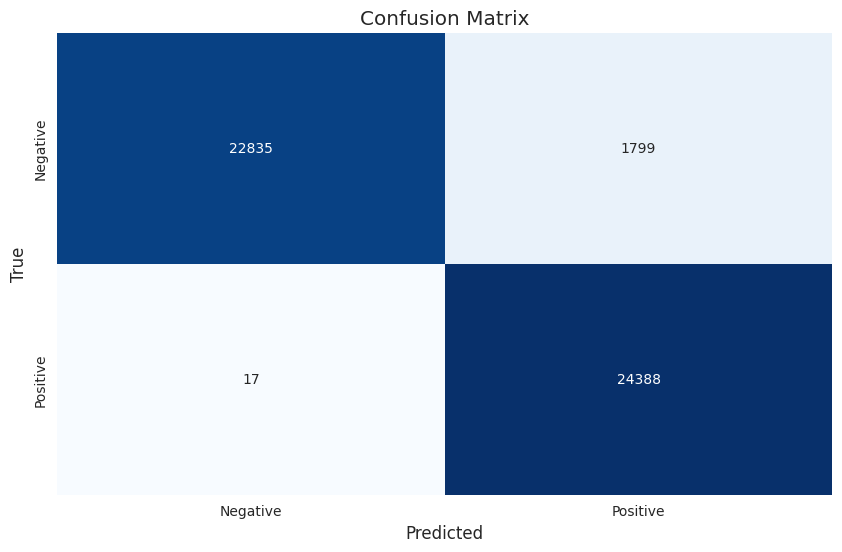

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la matriz de confusión
confusion = confusion_matrix(y_test, modelo.predict(X_test))

# Crear una figura de tamaño 10x6
plt.figure(figsize=(10, 6))

# Visualizar la matriz de confusión con seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

# Configurar las etiquetas de los ejes y el título
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Mostrar la figura
plt.show()


In [ ]:
# En esta matriz podemos observar que por sobre el total de datos analizados las permanencias reales y los
# abandonos reales son sumamente superiores a los casos donde la prediccion fallo y arrojo datos equivocados como falsos positivos
# de permanenecia como falsos abandonos.

In [ ]:
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([22835,  1799,    17, 24388])

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.9629682497603947

Anteriormente, el modelo tenía dificultades para predecir correctamente las clases positivas (Abandonos), pero mostraba una mayor precisión al predecir las clases negativas (Permanencia). Esta disparidad en la precisión se atribuía al desbalanceo de los datos, donde la clase negativa (Permanencia) tenía una abrumadora mayoría de ejemplos, lo que provocaba un subajuste del modelo. Sin embargo, después de aplicar el proceso de balanceo de datos, al observar la matriz de confusión, ahora se puede apreciar que el modelo logra predecir ambas clases de manera precisa.

In [ ]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa

(0.9313017909649827, 0.9992560826185892)

Cuando revisamos la precisión para cada categoria, vemos que predice muy mal la clase de interes; el abandono. Con un sólo 5% de precisión.

In [ ]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.9993034214300348, 0.9269708532921977)

In [ ]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     24634
           1       0.93      1.00      0.96     24405

    accuracy                           0.96     49039
   macro avg       0.97      0.96      0.96     49039
weighted avg       0.97      0.96      0.96     49039



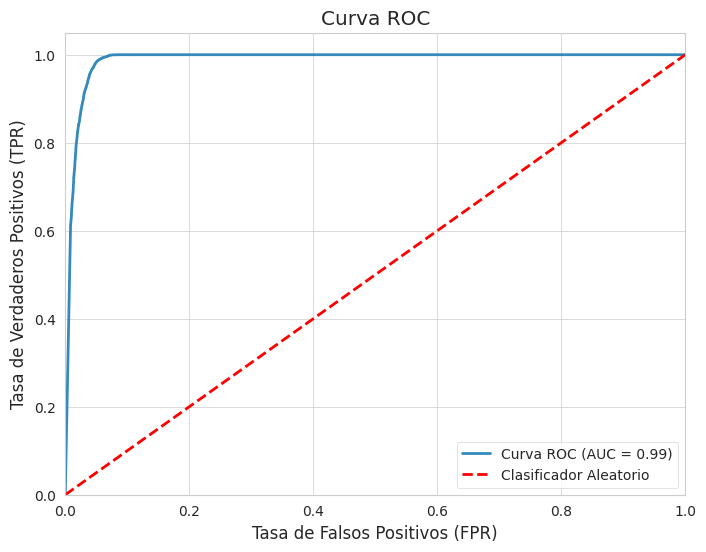

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de las clases positivas
y_prob = modelo.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos (True Positive Rate) y la tasa de falsos positivos (False Positive Rate)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Crear la figura
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc)

# Línea de referencia (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'r--', label='Clasificador Aleatorio')

# Configurar los ejes y las etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")

# Mostrar la figura
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Obtener las probabilidades de las clases positivas
y_prob = modelo.predict_proba(X_test)[:, 1]

# Calcular el AUC
auc = roc_auc_score(y_test, y_prob)

# Imprimir el valor del AUC
print("AUC: ", auc)


AUC:  0.9885289954501615


El AUC obtenido indica que el modelo tiene un rendimiento muy bueno para clasificar correctamente las instancias positivas y negativas.
Da un valor cercano a 1, podriamos decir que predice correctamente en alrededor del 98% de los casos.

# **CrossValidation: K-Fold**
*Otra manera de evaluar el modelo es la validación cruzada. En esta ocasión se utilizó K fold para evaluar el modelo predictivo mediante 5 iteraciones,lo que significa que se realizarán 5 iteraciones de entrenamiento y evaluación utilizando diferentes combinaciones de pliegues como datos de entrenamiento y prueba.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Definimos matriz de diseño X y vector respuesta y
X = df4.drop("ABANDONO_FULL", 1)
y = df4['ABANDONO_FULL']

# Creamos un modelo Random Forest con parámetros por defecto
modelo = RandomForestClassifier(random_state=1)

# Ejecutamos el cross-validation con k-fold
k = 5  # Número de folds
scores = cross_val_score(modelo, X, y, cv=k)

# Imprimimos los resultados de cada fold y el promedio
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score}")

print(f"Promedio: {scores.mean()}")


<ipython-input-68-57923c421ad2>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df4.drop("ABANDONO_FULL", 1)


Fold 1: 0.897550928852546
Fold 2: 0.9242235771528783
Fold 3: 0.8806664083688492
Fold 4: 0.8364363057974266
Fold 5: 0.5403360659080713
Promedio: 0.8158426572159542


In [ ]:
from sklearn.model_selection import KFold
# Definir el número de folds
k = 5

# Crear el objeto KFold
kf = KFold(n_splits=k, random_state=1, shuffle=True)

# Obtener los índices de entrenamiento y prueba para cada fold
fold_indices = list(kf.split(X))

# Recorrer cada fold y mostrar la distribución de datos
for i, (train_indices, test_indices) in enumerate(fold_indices):
    print(f"Fold {i+1}:")
    print("Indices de entrenamiento:", train_indices)
    print("Indices de prueba:", test_indices)
    print("Distribución de clases en entrenamiento:", y[train_indices].value_counts())
    print("Distribución de clases en prueba:", y[test_indices].value_counts())

Fold 1:
Indices de entrenamiento: [     0      1      2 ... 245191 245192 245193]
Indices de prueba: [    13     14     18 ... 245171 245181 245182]
Distribución de clases en entrenamiento: 1    98192
0    97963
Name: ABANDONO_FULL, dtype: int64
Distribución de clases en prueba: 0    24634
1    24405
Name: ABANDONO_FULL, dtype: int64
----------------------
Fold 2:
Indices de entrenamiento: [     0      2      5 ... 245191 245192 245193]
Indices de prueba: [     1      3      4 ... 245175 245183 245190]
Distribución de clases en entrenamiento: 0    98106
1    98049
Name: ABANDONO_FULL, dtype: int64
Distribución de clases en prueba: 1    24548
0    24491
Name: ABANDONO_FULL, dtype: int64
----------------------
Fold 3:
Indices de entrenamiento: [     0      1      2 ... 245190 245191 245192]
Indices de prueba: [     8     10     12 ... 245188 245189 245193]
Distribución de clases en entrenamiento: 1    98089
0    98066
Name: ABANDONO_FULL, dtype: int64
Distribución de clases en prueba: 0 

Con base en el resultado de la precisión promedio obtenida de 0.816, podemos concluir que el modelo Random Forest utilizado tiene un rendimiento razonablemente bueno en la predicción del abandono de los clientes.

Un valor de precisión promedio de 0.816 indica que, en promedio, el modelo fue capaz de predecir correctamente el abandono o la permanencia de los clientes en aproximadamente el 81.6% de las instancias evaluadas durante el cross-validation.

Esto sugiere que el modelo tiene una capacidad adecuada para distinguir entre los clientes que abandonan y los que permanecen, lo que puede ser valioso para identificar patrones o factores asociados al abandono.

En cuanto a la variabilidad de cada modelo, se puede señalar que una de las posibles razones sea que existe una distribución desigual de clases. En algunos de los folds, puedes observar una diferencia en la distribución de las clases entre los conjuntos de entrenamiento y prueba. Por ejemplo, en el Fold 1, hay 24,634 instancias de la clase 0 y 24,405 instancias de la clase 1 en el conjunto de prueba. Esto indica un equilibrio relativamente igual en la distribución de clases. Sin embargo, en otros folds, como el Fold 2, la distribución de clases en el conjunto de prueba es diferente, con 24,548 instancias de la clase 1 y 24,491 instancias de la clase 0. Estas diferencias en la distribución de clases pueden influir en el rendimiento del modelo, ya que puede haber más o menos instancias de una clase para aprender durante el entrenamiento y la evaluación.

# Conclusiones:
*Según los resultados obtenidos, se observa que las variables que predicen el abandono están relacionadas con diferentes aspectos. Por un lado, se encontró que el precio que se paga por el servicio de internet tiene un impacto significativo en las probabilidades de abandono. Aquellos clientes que pagan más por este servicio tienen una mayor tendencia a abandonar por completo sus servicios contratados.

Por otro lado, se encontró que la variable de tiempo de permanencia en la compañía también influye en el abandono. A medida que el tiempo de permanencia disminuye, aumenta la probabilidad de abandono. Esto sugiere que los clientes más nuevos en la compañía tienen una mayor propensión a abandonar en comparación con aquellos con mayor tiempo de permanencia.

Además, se identificó que la variable de la zona en la que se encuentra el cliente es relevante en la predicción del abandono. Este hallazgo permite investigar más a fondo las zonas con mayor tasa de abandono para determinar si existen factores como competencia, problemas en la infraestructura del servicio, entre otros, que puedan influir en esta tendencia.

Asimismo, se encontró que el cambio de velocidad del servicio también juega un papel importante. Los clientes que han experimentado cambios en la velocidad de su conexión presentan mayores probabilidades de abandono en comparación con aquellos que no han tenido modificaciones en su servicio. Este resultado indica que los clientes pueden estar insatisfechos con el servicio después de experimentar cambios en la velocidad.

En relación a la variable "CRUCE_ACTIVO", que indica el tipo de servicios contratados por el cliente, se observó que aquellos que tienen contratado únicamente el servicio de internet (BA) presentan mayores probabilidades de abandono en comparación con aquellos que tienen otros servicios adicionales. Esto sugiere que la falta de diversificación en los servicios contratados puede influir en la decisión de abandonar.

Por último, se encontró que los clientes que tienen contratado el servicio de telefonía presentan menores probabilidades de abandono. Esto indica que la presencia de este servicio puede contribuir a una mayor retención de clientes.

En resumen, los resultados del modelo señalan que el abandono está relacionado con el precio del servicio de internet, el tiempo de permanencia, la zona geográfica, los cambios de velocidad, la diversificación de los servicios contratados y la presencia del servicio de telefonía. Estos hallazgos pueden ser utilizados para tomar medidas específicas orientadas a reducir el abandono y mejorar la retención de clientes en la compañía.
*
